In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

download dataset from this link : https://www.kaggle.com/code/ngbolin/mnist-dataset-digit-recognizer/data

In [72]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [73]:
train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [74]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
def one_hot(y):
    label_zero = [0]*10
    label = label_zero.copy()
    label_mat=[]
    for i in y:
        label[i] = 1
        label_mat.append(label)
        label = label_zero.copy()
    label = np.array(label_mat)
    return label

In [76]:
train_shuffle = train.sample(frac=1, random_state=23).reset_index(drop=True)
X = train_shuffle.drop(columns='label')
y =  train_shuffle.label

r, c = X.shape
n_val = int(round(r*20/100,0))
n_train = r - n_val

X_train = np.array(X[0:n_train])*1/255
X_val = np.array(X[n_train:])*1/255
y_train = one_hot(y[0:n_train])
y_val = one_hot(y[n_train:])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

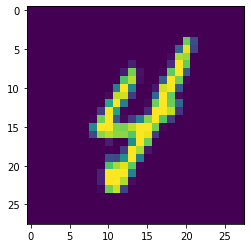

In [77]:
plt.imshow(np.array(X_train[4]).reshape(28,28))
y_train[4]

In [79]:
#initiate the weights and bias
def init_params():
    w1 = np.random.uniform(-0.5, 0.5, size=(10, 784))
    w2 = np.random.uniform(-0.5, 0.5, size=(10, 10))
    b1 = np.zeros(10)
    b2 = np.zeros(10)
    return w1, w2, b1, b2

In [80]:
#forward propagation
def forward_prop(X, w1, w2, b1, b2):
    # input -> hidden
    h_net = b1 + w1@X
    h = 1/(1+np.exp(-h_net))
    # hidden -> output
    o_net = b2 + w2@h
    o = 1/(1+np.exp(-o_net))
    return h, o

In [81]:
#calculatin error
def error_calc(o, y):
    err = 1/len(o)*(o-y)**2
    total_err = sum(err)
    global n_correct
    n_correct += int(np.argmax(o) == np.argmax(y))
    return err, total_err, n_correct

def error_calc_val(o, y):
    err = 1/len(o)*(o-y)**2
    total_err = sum(err)
    global n_correct_val
    n_correct_val += int(np.argmax(o) == np.argmax(y))
    return n_correct_val

In [104]:
#backpropagation
def backward_prop(X, y, o, h, w1,b1, w2, b2):
    # output -> hidden
    e_tot_o = -(y-o)
    out_net_o = o*(1-o)
    delta_w2 = e_tot_o*out_net_o

    # hidden -> input
    e_tot_out_h = np.sum(delta_w2*w2.T, axis=1)
    out_net_h = h*(1-h)
    delta_w1 = e_tot_out_h*out_net_h

    # update
    w2 += -alpha*delta_w2.reshape(len(delta_w2),1)*h
    b2 += -alpha*delta_w2
    w1 += -alpha*delta_w1.reshape(len(delta_w1),1)*X
    b1 += -alpha*delta_w1

    return w1, w2, b1, b2

In [105]:
#train the model

w1, w2, b1, b2 = init_params()
alpha = 0.05
n_correct = 0
n_correct_val = 0
val_accuracy = []
train_accuracy = []

for i in range(15):
    for j in range(n_train):
        h,o = forward_prop(X_train[j], w1, w2, b1, b2)
        err, total_err, n_correct = error_calc(o, y_train[j])
        w1, w2, b1, b2  = backward_prop(X_train[j], y_train[j], o, h, w1,b1, w2, b2)

    for k in range(n_val):
        h_val,o_val = forward_prop(X_val[k], w1, w2, b1, b2)
        n_correct_val = error_calc_val(o_val, y_val[k])
    if i % 1 == 0:
        train_acc = round(n_correct/n_train*100, 2)
        val_acc = round(n_correct_val/n_val*100, 2)
        print(f'Epoch {i+1}: Train_acc {train_acc} %, val_acc {val_acc} %')
    train_accuracy.append(train_acc)
    val_accuracy.append(val_acc)
    n_correct = 0
    n_correct_val = 0

Epoch 1: Train_acc 70.67 %, val_acc 87.51 %
Epoch 2: Train_acc 89.16 %, val_acc 89.98 %
Epoch 3: Train_acc 90.69 %, val_acc 90.55 %
Epoch 4: Train_acc 91.38 %, val_acc 90.89 %
Epoch 5: Train_acc 91.76 %, val_acc 91.12 %
Epoch 6: Train_acc 92.12 %, val_acc 91.23 %
Epoch 7: Train_acc 92.4 %, val_acc 91.4 %
Epoch 8: Train_acc 92.54 %, val_acc 91.42 %
Epoch 9: Train_acc 92.74 %, val_acc 91.58 %
Epoch 10: Train_acc 92.95 %, val_acc 91.65 %
Epoch 11: Train_acc 93.1 %, val_acc 91.71 %
Epoch 12: Train_acc 93.25 %, val_acc 91.79 %
Epoch 13: Train_acc 93.38 %, val_acc 91.87 %
Epoch 14: Train_acc 93.45 %, val_acc 91.87 %
Epoch 15: Train_acc 93.56 %, val_acc 91.95 %


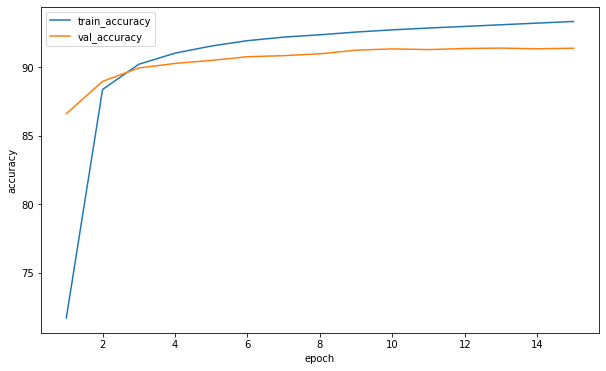

In [101]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, 16), train_accuracy)
plt.plot(np.arange(1, 16), val_accuracy)
plt.legend(['train_accuracy','val_accuracy'])
plt.xlabel('epoch');
plt.ylabel('accuracy');

### Inference

In [149]:
inference = np.array(test.sample(frac=0.5).reset_index(drop=True).head(25))

C:\Users\Owner\AppData\Local\Temp\ipykernel_6496\122807019.py:4: RuntimeWarning: overflow encountered in exp
  h = 1/(1+np.exp(-h_net))


Text(0.5, 0.98, 'Inference and Prediction')

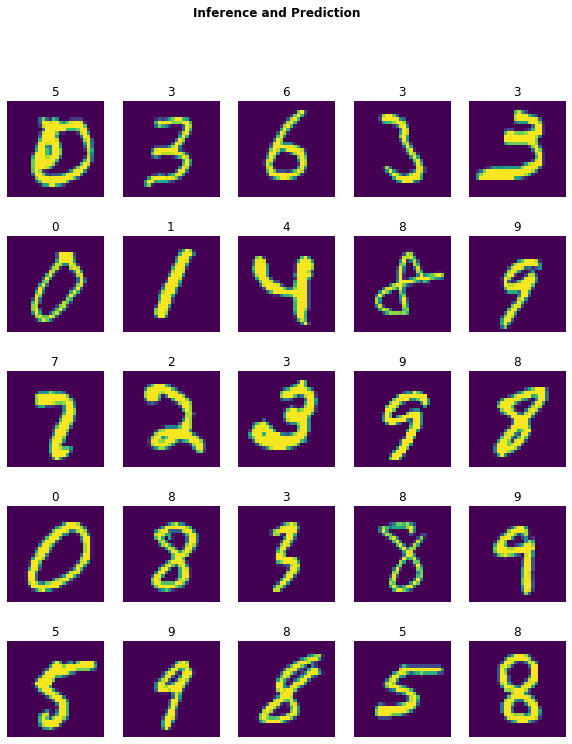

In [155]:
fig, ax = plt.subplots(5,5, figsize=(10,12))
ax = ax.flatten()
predict = []
for i in range(25):
    pred = np.argmax(forward_prop(inference[i], w1, w2, b1, b2)[1]);
    ax[i].imshow(np.array(inference[i]).reshape(28,28))
    ax[i].axis('off')
    ax[i].set_title(pred)
    predict.append(pred)
fig.suptitle('Inference and Prediction',fontweight ="bold")